# Introduction to Time Series


This tutorial will introduce the time series analysis, providing definitions and classical models for modeling them.

A time serie $\{\boldsymbol{x}_l\}_{l=1}^L$ is an **ordered sequence of values** indexed by $l \in \mathbb{Z}$ times, such that:

$\begin{equation}t_{l-1} < t_{l} < t_{l+1}\end{equation}$

where $t \in \mathbb{R}$ is the sampling time. 

Notice that $\boldsymbol{x}$ could be a vector. For simplicity we will assume it a scalar **random variable**.

When we work with time series, it is recommendable to visualize data over time. It gives us a first approach to the series properties.

There are two branches in the characterization of time series:
- **Time Domain Approach**: Lagged relationships, i.e.,  how the past and present affect the future?
- **Frequency Domain Approach**: Investigation of cycles

Let's prepare our data!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

In [2]:
cobre_df = pd.read_csv('cobre.csv', usecols=[0,1])
cobre_df.head()

,Fecha,Último
0,26.11.2020,"3,3310"
1,25.11.2020,"3,3095"
2,24.11.2020,"3,2995"
3,23.11.2020,"3,2580"
4,22.11.2020,"3,2853"


In [3]:
cobre_df['Fecha'] = cobre_df.apply(lambda x: pd.to_datetime(x['Fecha']), 1)
cobre_df['Último'] = cobre_df.apply(lambda x: float(x['Último'].replace(',', '.')), 1)

cobre_df = cobre_df.sort_values('Fecha')

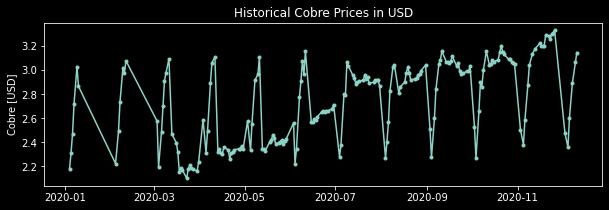

In [4]:
fig, axes = plt.subplots(1,1,figsize=(10,3))
axes.plot(cobre_df['Fecha'], cobre_df['Último'], '.-')
axes.set_ylabel('Cobre [USD]')
axes.set_title('Historical Cobre Prices in USD')
plt.show()

Now we are going to describe time series using measurement of dependences

## Marginal Descriptive measure
### Mean
$\mu_{xt} = E(x_t) = \int_{-\infty}^{\infty} xf_t(x)dx$

In [5]:
mean = cobre_df['Último'].mean()

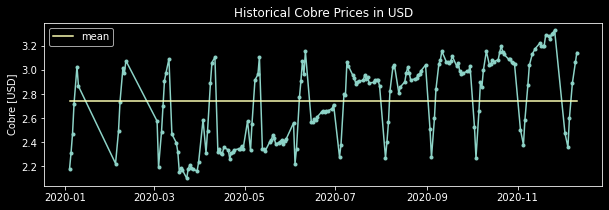

In [6]:
fig, axes = plt.subplots(1,1,figsize=(10,3))
axes.plot(cobre_df['Fecha'], cobre_df['Último'], '.-')
axes.plot([cobre_df['Fecha'].min(), cobre_df['Fecha'].max()], [mean, mean], label='mean')
axes.set_ylabel('Cobre [USD]') 
axes.legend()
axes.set_title('Historical Cobre Prices in USD')
plt.show()

### The autocovariance function
Linear dependence between two point on the same serie observed at different times.

$\gamma_x(s, l) = cov(x_s, x_l) = E[(x_s - \mu_x)(x_l - \mu_x)]$

Note that $\gamma_x(s, l) = \gamma_x(l, s)$ for all time $s$ and $t$

In [7]:
try:
    import statsmodels.tsa.api as smt
except:
    !pip install statsmodels

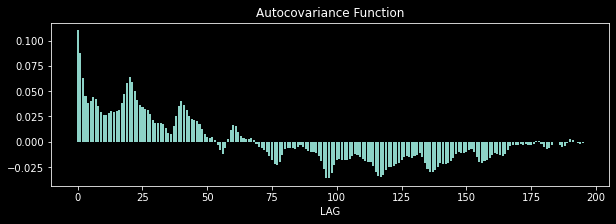

In [8]:
acov = smt.stattools.acovf(cobre_df['Último'], nlag=None)
plt.figure(figsize=(10,3))
plt.bar(range(len(acov)), acov)
plt.title('Autocovariance Function')
plt.xlabel('LAG')
plt.show()

### Autocorrelation Function (ACF)
The ACF measures the linear predictability of the series at time $l$, say $x_l$ using only
the value $x_s$.

$\rho (s, t) = \frac{\gamma(s, l)}{\sqrt{\gamma(s,s)\gamma(l,l)}}$

for **regular** time series i.e., $\Delta t_l = \Delta t_s \forall (l,s) \in \mathbb{Z}$ where $\Delta l = t_l - t_{l-1}$ and $\Delta s = t_s - t_{s-1}$

$\rho(k) = \frac{\sum_{l = k+1}^L (x_l - \bar{x})(x_{l-k} - \bar{x})}{\sum_{l=1}^L (x_l - \hat{x})^2}$

In [9]:
from statsmodels.tsa import stattools

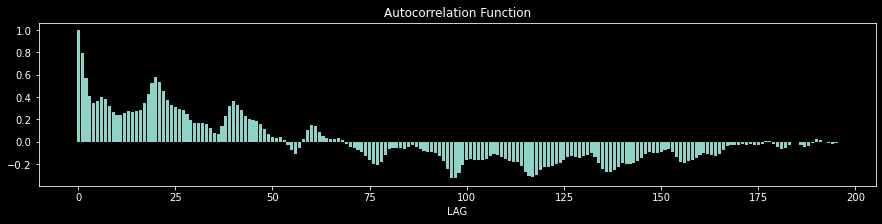

In [10]:
acf = stattools.acf(cobre_df['Último'], nlags=200)
plt.figure(figsize=(15,3))
plt.bar(range(len(acf)), acf)
plt.title('Autocorrelation Function')
plt.xlabel('LAG')
plt.show()

you can also use `matplotlib` for visualizing autocorrelation

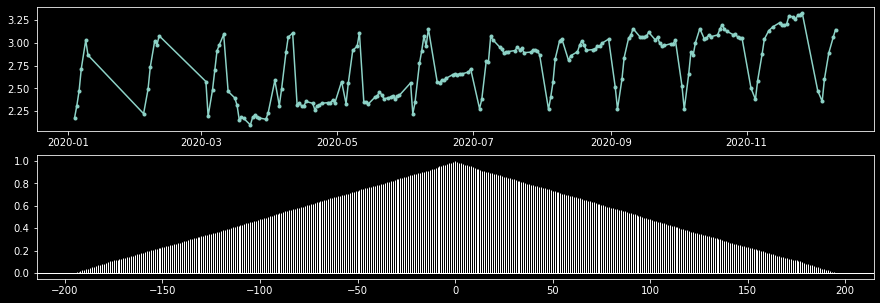

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(15,5))

axes[0].plot(cobre_df['Fecha'], cobre_df['Último'], '.-')
axes[1].acorr(cobre_df['Último'], usevlines=True, normed=True, maxlags=None, lw=1)
plt.show()

## Partial Autocorrelation

Autocorrelation without indirect correlations

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

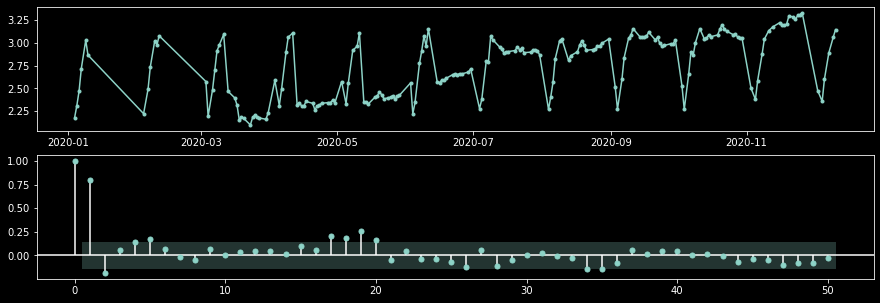

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15,5))

axes[0].plot(cobre_df['Fecha'], cobre_df['Último'], '.-')
plot_pacf(cobre_df['Último'], lags=50, ax=axes[1],title='')
plt.show()



## Studying Time Series Behavior

Until now, we have seen general descriptors. However, we did not introduce assumptions about the behavior of the sequence. 

## Stationarity


### Strictly Stationary

The behavior of $\{ x_{t_1}, x_{t_2}, x_{t_3}\}$ should be identical of $\{ x_{t_1 + h}, x_{t_2 + h}, x_{t_3+ h}\}$. In other words 

$P(x_{t_1}\leq c_1, ..., x_{t_l}\leq c_l) \equiv P(x_{t_1+h}\leq c_1, ..., x_{t_l + h}\leq c_l)$

for all steps $l \in \mathbb{Z}$ indexing $t \in \mathbb{R}$

$\mu_l = \mu_{s}$ for all $l$ and $s$. So then $\Rightarrow \mu$

Similarly, the autocovariance function,

$\gamma(s, l) = \gamma(s+h, l+h)$

Intuitively, we say the result of the autocovariance of the process depends only on the time difference between 𝑠 and 𝑙 and not on the actual times.

### Weakly Stationary
**Strictly stationary** the joint probability of a given shifted subset concerning the other should be the same.

**Weakly Stationary** concerns the shift-time-invariance of **first** and **second moments** of a process

In general, we refer to weak stationarity when we say stationarity.

## Trend Techniques
### Moving Average Smooting

$\hat{T}_l = \frac{1}{m} \sum_{j=-k}^k x_{l+j}$ where $m = 2k +1$

In [14]:
def MovingAverageSmoothing(serie, k=3):
    steps  = len(serie)
    trends = []
    m = 2*k + 1
    for j in range(k, steps-k):
        t = np.sum(serie[j-k:j+k])*(1/m)
        trends.append(t)
    return np.array(trends)

In [15]:
k = 5
trend_cobre = MovingAverageSmoothing(cobre_df['Último'], k=k)
times_trend = cobre_df['Fecha'][k:-k]

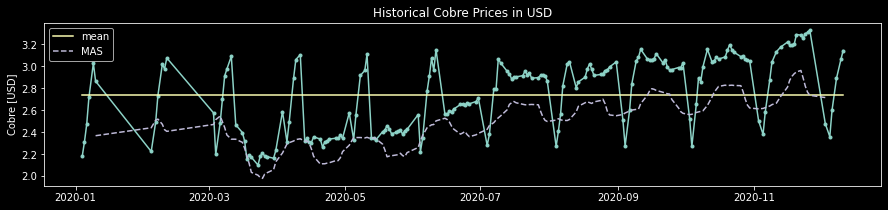

In [16]:
fig, axes = plt.subplots(1,1,figsize=(15,3))
axes.plot(cobre_df['Fecha'], cobre_df['Último'], '.-')
axes.plot([cobre_df['Fecha'].min(), cobre_df['Fecha'].max()], [mean, mean], label='mean')
axes.plot(times_trend, trend_cobre, '--', label='MAS')
axes.set_ylabel('Cobre [USD]') 
axes.legend()
axes.set_title('Historical Cobre Prices in USD')
plt.show()

### Simple Exponential Smoothing

$x_{l+1} = \alpha x_l + \alpha(1 - \alpha)x_{l-1} + \alpha(1-\alpha)^2x_{l-2}...$

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [18]:
data = cobre_df
model_no_fitted = SimpleExpSmoothing(cobre_df['Último']).fit(smoothing_level=0.2,
                                                             optimized=False)
model_fitted = SimpleExpSmoothing(cobre_df['Último']).fit()

/home/cridonoso/.conda/envs/tf2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/cridonoso/.conda/envs/tf2/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


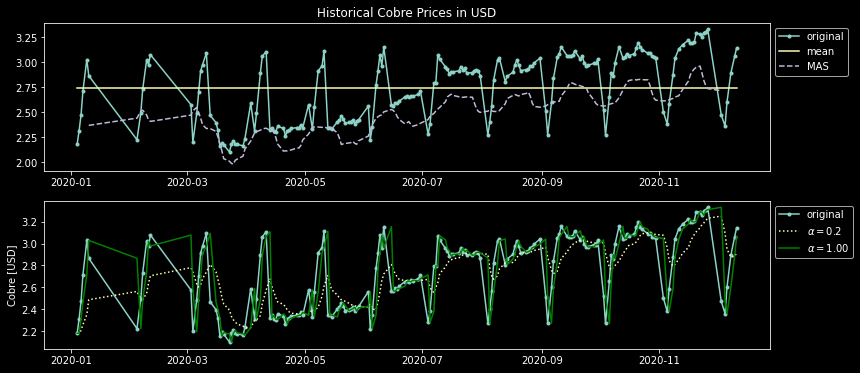

In [19]:
fig, axes = plt.subplots(2,1,figsize=(13,6))

axes[0].plot(cobre_df['Fecha'], cobre_df['Último'], '.-', label='original')
axes[0].plot([cobre_df['Fecha'].min(), cobre_df['Fecha'].max()], [mean, mean], label='mean')
axes[0].plot(times_trend, trend_cobre, '--', label='MAS')
axes[0].legend(bbox_to_anchor=(1,1))

axes[1].plot(cobre_df['Fecha'], cobre_df['Último'], '.-', label='original')
axes[1].plot(cobre_df['Fecha'], model_no_fitted.fittedvalues, ':', label=r'$\alpha=0.2$')
axes[1].plot(cobre_df['Fecha'], model_fitted.fittedvalues, '-', 
             label=r'$\alpha={:.2f}$'.format(model_fitted.params['smoothing_level']), 
             color='g')

axes[1].set_ylabel('Cobre [USD]') 
axes[1].legend(bbox_to_anchor=(1,1))
axes[0].set_title('Historical Cobre Prices in USD')
plt.show()

## Autoregressive Processes

An Autoregressive Process **generalize the idea of regression** to mimic the **linear dependence** between a dependent variable $x_t$ and its past $x_{t-1}$, such that:

$\begin{equation}x_t = c + bx_{t-1} + \epsilon_t\end{equation}$

where $\epsilon_t \sim \mathcal{N}(0, \sigma^2)$ $i.i.d$ is the gaussian **error of the process** and $t \in \mathbb{Z}_+$ is an **index variable** representing the step within the serie.

We can also extend the formula above to generalize over more than 1 step back (**lags**), let's say:

$\begin{equation}x_t = c + bx_{t-1}+ b'x_{t-2}+ b''x_{t-2} + \epsilon_t\end{equation}$

A serie $\{x_i\}_{t=1}^T$ follows **first order autoregressive process (AR(1))** if 

$\begin{equation}x_t = c + \phi x_{t-1} + \epsilon_t\end{equation}$

where:
- $c$ is a constant
- $\phi$ is a constant and it is constrained to $-1<\phi<1$ to force the process to be **stationary**
- $\epsilon_t \sim \mathcal{N}(0, \sigma^2)$ $i.i.d$ is called *innovations*

Since the process is stationary, then $E[x_t] = E[x_{t-1}] = \mu = \frac{c}{1-\phi}$ [(proof)](./stationarity.pdf)

By reeplacing $c$ in the AR(1) we obtain the most used AR(1)

$x_{t} = \phi x_{t-1} + \epsilon_t$

where $\phi^k$ is also the **autocorrelation** of order $k$

In [20]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [21]:
x = cobre_df['Último'].values

In [22]:
stationary_test = adfuller(x, autolag='AIC')

In [23]:
print('p value: {:.2e}'.format(stationary_test[1]))

p value: 6.53e-06


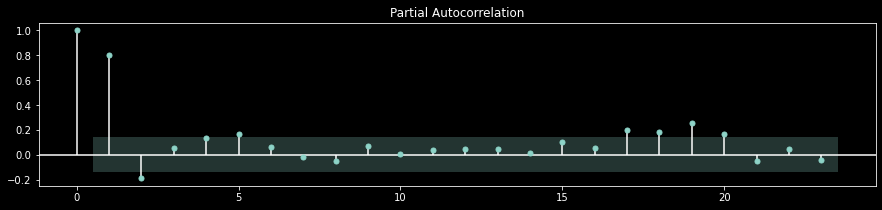

In [24]:
fig, axes = plt.subplots(1,1, figsize=(15,3))
plot_pacf(x, lags=None, ax=axes,title='Partial Autocorrelation')
plt.show()

by seeing the PACF we can define our **autoregressive lags**.

Now let's we split the serie in **training** and **testing** subset

In [29]:
cobre_df['Fecha'].shape

(196,)

In [30]:
t_train, t_test = cobre_df['Fecha'][:150], cobre_df['Fecha'][150:]
x_train, x_test = x[:150], x[150:]

In [31]:
ar_model = AutoReg(x_train, lags=20)
ar_model = ar_model.fit()

In [32]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                    AutoReg(20)   Log Likelihood                  58.087
Method:               Conditional MLE   S.D. of innovations              0.155
Date:                Wed, 02 Dec 2020   AIC                             -3.393
Time:                        09:34:22   BIC                             -2.908
Sample:                            20   HQIC                            -3.196
                                  150                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0039      0.196      0.020      0.984      -0.380       0.388
y.L1           0.7443      0.085      8.756      0.000       0.578       0.911
y.L2          -0.0407      0.103     -0.395      0.693      -0.243       0.161
y.L3          -0.0409      0.103     -0.398      0.690      -0.242       0.160
y.L4          -0.0532      0.103     -0.518      0.604      -0.254       0.148
y.L5           0.1825      0.102      1.789      0.074      -0.017       0.383
y.L6          -0.1255      0.103     -1.220      0.223      -0.327       0.076
y.L7           0.0921      0.102      0.906      0.365      -0.107       0.291
y.L8          -0.0426      0.102     -0.418      0.676      -0.242       0.157
y.L9           0.0580      0.101      0.577      0.564      -0.139       0.255
y.L10         -0.0435      0.100     -0.434      0.664      -0.240       0.153
y.L11          0.0471      0.100      0.471      0.638      -0.149       0.243
y.L12         -0.0219      0.100     -0.219      0.827      -0.218       0.174
y.L13         -0.0668      0.099     -0.676      0.499      -0.261       0.127
y.L14         -0.0260      0.095     -0.273      0.785      -0.213       0.161
y.L15          0.1314      0.094      1.395      0.163      -0.053       0.316
y.L16         -0.1173      0.094     -1.245      0.213      -0.302       0.067
y.L17         -0.0197      0.095     -0.207      0.836      -0.206       0.167
y.L18          0.1131      0.095      1.185      0.236      -0.074       0.300
y.L19          0.1332      0.097      1.378      0.168      -0.056       0.323
y.L20          0.1000      0.080      1.253      0.210      -0.056       0.257
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9994           -0.0000j            0.9994           -0.0000
AR.2             0.9768           -0.2892j            1.0187           -0.0458
AR.3             0.9768           +0.2892j            1.0187            0.0458
AR.4             0.8354           -0.6022j            1.0298           -0.0994
AR.5             0.8354           +0.6022j            1.0298            0.0994
AR.6             0.6263           -0.8530j            1.0582           -0.1492
AR.7             0.6263           +0.8530j            1.0582            0.1492
AR.8             0.3266           -1.0079j            1.0595           -0.2001
AR.9             0.3266           +1.0079j            1.0595            0.2001
AR.10           -0.0647           -1.0867j            1.0886           -0.2595
AR.11           -0.0647           +1.0867j            1.0886            0.2595
AR.12           -0.9065           -0.6501j            1.1155           -0.4010
AR.13           -0.9065           +0.6501j            1.1155            0.4010
AR

In [33]:
x_pred_ar = ar_model.predict(start=len(x_train), end=len(x)-1)

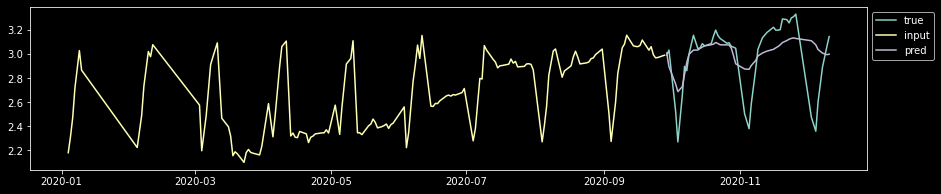

In [34]:
fig, axes = plt.subplots(1,1, figsize=(15,3))
axes.plot(t_test, x_test, label='true')
axes.plot(t_train, x_train, label='input')
axes.plot(t_test, x_pred_ar, label='pred')
axes.legend(bbox_to_anchor=(1,1))
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
print('RMSE: {:.2f}'.format(mean_squared_error(x_test, x_pred_ar)))

RMSE: 0.05


## The First Order Moving Average MA(1)

The AR is relatively a good model for modeling **long-term dependencies**. Basically we predict the next point based on all previous observations.

When the current value is only correlated with a small number of previous values, the AR is not good enough.

**Moving Average** is a family of processes that have *very short memory*

It is defined by 
$\begin{equation}
\bar{x}_t = \epsilon_{t} + \phi_1 \epsilon_{t-1}
\end{equation}$

where $\bar{x}_t = x_t - \mu$ and $\epsilon$ is an error term ($i.i.d \sim \mathcal{N}(0, \sigma^2)$) defining the change in a particular time


with, 
- $E[x_t]=E[\epsilon_{t} - \phi_1 \epsilon_{t-1}] = 0 $
- $Var[x_t]= Var(\epsilon_{t} - \phi_1 \epsilon_{t-1}) =\sigma^2(1+\theta^2_1)$
- $\rho_1 = \dfrac{\theta_1}{1+\theta^2_1}, \text{ and } \rho_h = 0 \text{ for } h \ge 2$

Generalizing to more than 1 order:

$\begin{equation}
x_t = \epsilon_{t} - \phi_1 \epsilon_{t-1} - \phi_2 \epsilon_{t-2} -...- \phi_k \epsilon_{t-k}
\end{equation}$

where $k$ is the maximum lag.

## Autoregresive Moving Average (ARMA)

It is the combination of an autoregressive model of lag $k_{ar}$ and a moving average model of lag $k_{ma}$

$\text{ARMA}(k_{ar}, k_{ma}) = \text{AR}(k_{ar}) + \text{MA}(k_{ma})$


In [36]:
from statsmodels.tsa.arima_model import ARMA

In [37]:
%%time
arma_model = ARMA(x_train, order=(20, 2))
arma_model = arma_model.fit(method='css')

CPU times: user 1.23 s, sys: 2.09 ms, total: 1.24 s
Wall time: 1.24 s


In [38]:
x_pred_arma = arma_model.predict(len(x_train), len(x)-1)

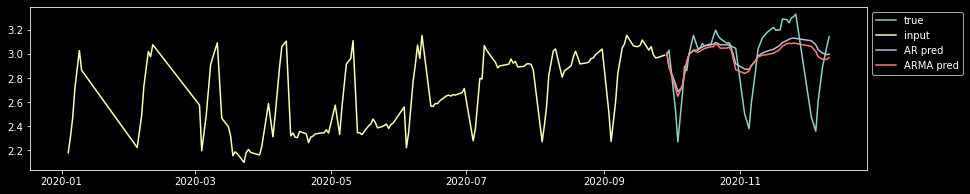

In [39]:
fig, axes = plt.subplots(1,1, figsize=(15,3))
axes.plot(t_test, x_test, label='true')
axes.plot(t_train, x_train, label='input')
axes.plot(t_test, x_pred_ar, label='AR pred')
axes.plot(t_test, x_pred_arma, label='ARMA pred')
axes.legend(bbox_to_anchor=(1,1))
plt.show()

## Autoregressive Integrated Moving Average (ARIMA)

It is like an ARMA model, but in this case, we add a new $d$ hyperparameter, which **differentiates** the input variable until **we success stationarity**.

We use ARIMA models in cases where the series **appear to be stationary** except for the moving mean. 

### What does differentiation means?

**Differentiation** is the process by which a series is transformed into its differences:

$\begin{equation}z_t = x_{t+1} - x_t ,\ \ \forall t\in T \end{equation}$

In [40]:
first_d = np.diff(x_train) # First differentiation
second_d = np.diff(first_d) # Second differentiation

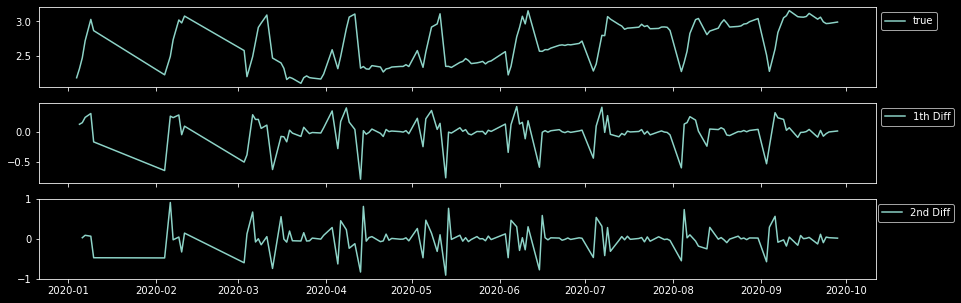

In [41]:
fig, axes = plt.subplots(3,1, figsize=(15,5), sharex=True)
axes[0].plot(t_train, x_train, label='true')
axes[0].legend(bbox_to_anchor=(1,1))
axes[1].plot(t_train[1:], first_d, label='1th Diff')
axes[1].legend(bbox_to_anchor=(1.1,1))
axes[2].plot(t_train[2:], second_d, label='2nd Diff')
axes[2].legend(bbox_to_anchor=(1.1,1))

ARIMA tries to predict not only on the original series but also its $d$ differentiations. 

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
arima_model = ARIMA(x_train, order=(20,1,1))
arima_model = arima_model.fit(method='css')

In [44]:
x_pred_arima = arima_model.forecast(steps=len(t_test))[0]

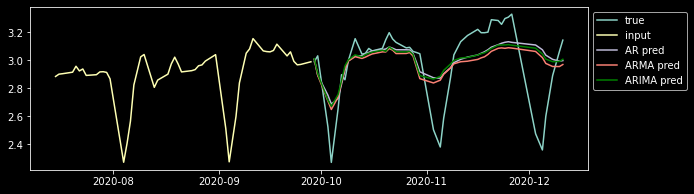

In [45]:
fig, axes = plt.subplots(1,1, figsize=(10,3))
axes.plot(t_test, x_test, label='true')
axes.plot(t_train[100:], x_train[100:], label='input')
axes.plot(t_test, x_pred_ar, label='AR pred')
axes.plot(t_test, x_pred_arma, label='ARMA pred')
axes.plot(t_test, x_pred_arima, label='ARIMA pred', color='green')
axes.legend(bbox_to_anchor=(1,1))
plt.show()

In [46]:
print('AR: {:.3f}\nARMA: {:.3f}\nARIMA: {:.3f}'.format(mean_squared_error(x_test, x_pred_ar),
                                               mean_squared_error(x_test, x_pred_arma),
                                               mean_squared_error(x_test, x_pred_arima)))

AR: 0.049
ARMA: 0.048
ARIMA: 0.048


In [47]:
import itertools
import multiprocessing
from joblib import Parallel, delayed

In [70]:
p = range(15, 20)
d = range(0, 3)
q = range(0, 10)
pdq = list(itertools.product(p,d,q))

In [71]:
%%time
def train_step(conf):
    try:
        model = ARIMA(x_train, order=conf)
        model = model.fit(method='css')
        return model
    except:
        return None


num_cores = multiprocessing.cpu_count()
response = Parallel(n_jobs=num_cores)(delayed(train_step)(conf) for conf in pdq)

CPU times: user 251 ms, sys: 25.2 ms, total: 277 ms
Wall time: 2min 13s


In [76]:
aic_list = [(m.bic, m) for m in response if m is not None]
aic_list = sorted(aic_list, key=lambda tup: tup[0])
best_arima = aic_list[0][-1]
best_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  149
Model:                ARIMA(15, 1, 2)   Log Likelihood                  54.236
Method:                           css   S.D. of innovations              0.161
Date:                Wed, 02 Dec 2020   AIC                            -70.472
Time:                        10:06:01   BIC                            -15.413
Sample:                             1   HQIC                           -48.098
                                    6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.003      0.626      0.531      -0.004       0.008
ar.L1.D.y      1.2257      0.120     10.238      0.000       0.991       1.460
ar.L2.D.y     -0.6225      0.151     -4.129      0.000      -0.918      -0.327
ar.L3.D.y     -0.0605      0.147     -0.413      0.680      -0.348       0.227
ar.L4.D.y     -0.1317      0.135     -0.972      0.331      -0.397       0.134
ar.L5.D.y      0.1524      0.135      1.130      0.259      -0.112       0.417
ar.L6.D.y     -0.2427      0.141     -1.717      0.086      -0.520       0.034
ar.L7.D.y      0.1010      0.145      0.697      0.486      -0.183       0.385
ar.L8.D.y     -0.2219      0.139     -1.600      0.110      -0.494       0.050
ar.L9.D.y      0.1461      0.120      1.215      0.224      -0.090       0.382
ar.L10.D.y    -0.1891      0.127     -1.486      0.137      -0.439       0.060
ar.L11.D.y     0.0081      0.138      0.059      0.953      -0.262       0.278
ar.L12.D.y    -0.1138      0.137     -0.830      0.406      -0.382       0.155
ar.L13.D.y     0.0369      0.138      0.268      0.789      -0.233       0.307
ar.L14.D.y    -0.0692      0.128     -0.540      0.589      -0.320       0.182
ar.L15.D.y    -0.1378      0.093     -1.476      0.140      -0.321       0.045
ma.L1.D.y     -1.5104      0.097    -15.641      0.000      -1.700      -1.321
ma.L2.D.y      0.7470      0.094      7.917      0.000       0.562       0.932
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9721           -0.3063j            1.0192           -0.0486
AR.2             0.9721           +0.3063j            1.0192            0.0486
AR.3             0.8332           -0.5954j            1.0241           -0.0987
AR.4             0.8332           +0.5954j            1.0241            0.0987
AR.5             0.6405           -0.8767j            1.0857           -0.1496
AR.6             0.6405           +0.8767j            1.0857            0.1496
AR.7             0.2579           -1.0987j            1.1286           -0.2133
AR.8             0.2579           +1.0987j            1.1286            0.2133
AR.9            -0.3156           -1.1444j            1.1871           -0.2928
AR.10           -0.3156           +1.1444j            1.1871            0.2928
AR.11           -0.7918           -0.9332j            1.2238           -0.3620
AR.12           -0.7918           +0.9332j            1.2238            0.3620
AR.13           -1.0543           -0.4624j            1.1513           -0.4342
AR.14           -1.0543           +0.4624j            1.1513            0.4342
AR.15           -1.5860           -0.0000j            1.5860           -0.5000
MA.1             1.0110           -0.5626j            1.1570           -0.0808
MA

In [77]:
x_pred_arima = best_arima.forecast(steps=len(t_test))[0]

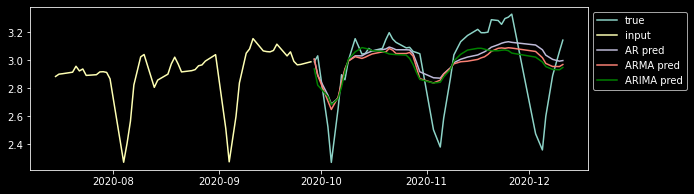

In [78]:
fig, axes = plt.subplots(1,1, figsize=(10,3))
axes.plot(t_test, x_test, label='true')
axes.plot(t_train[100:], x_train[100:], label='input')
axes.plot(t_test, x_pred_ar, label='AR pred')
axes.plot(t_test, x_pred_arma, label='ARMA pred')
axes.plot(t_test, x_pred_arima, label='ARIMA pred', color='green')
axes.legend(bbox_to_anchor=(1,1))
plt.show()

In [79]:
print('AR: {:.3f}\nARMA: {:.3f}\nARIMA: {:.3f}'.format(mean_squared_error(x_test, x_pred_ar),
                                               mean_squared_error(x_test, x_pred_arma),
                                               mean_squared_error(x_test, x_pred_arima)))

AR: 0.049
ARMA: 0.048
ARIMA: 0.046
